In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pygam import LinearGAM, s
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from itertools import product
from sklearn.utils import resample

In [2]:
seed = 4300 # for STK-IN4300
# the seed is set in all cells that require randomization to ensure reproducibility regardless of the cell execution order

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv', sep=';', header=None)

In [4]:
# need the column names 
columns = ["TPSA", "SAacc", "H050", "MLOGP", "RDCHI", "GATS1p", "nN", "C040", "LC50"]

**Column information**

TPSA: the topological polar surface area calculated by means of a contribution method that takes into account nitrogen, oxygen, potassium and sulphur;

SAacc: the Van der Waals surface area (VSA) of atoms that are acceptors of hydrogen bonds;

H050: the number of hydrogen atoms bonded to heteroatoms;

MLOGP: expresses the lipophilicity of a molecule, this being the driving force of narcosis;

RDCHI: a topological index that encodes information about molecular size and branching;  

GATS1p: information on molecular polarisability;

nN: the number of nitrogen atoms present in the molecule;

C040: the number of carbon atoms of a certain type, including esters, carboxylic acids, thioesters, carbamic acids, nitriles, etc.;

In [5]:
# add column names
data.columns = columns
data

,TPSA,SAacc,H050,MLOGP,RDCHI,GATS1p,nN,C040,LC50
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


**(a). Split the data into a training and a test set, with approximately 2/3 and 1/3 of the observations, respectively. In terms of the count variables, consider the two following modelling options: (i) model each of them directly as a linear effect; (ii) transform each of them using a 0/1 dummy encoding where 0 represents absence of the specific atom and 1 represents presence of the specific atoms. Fit two separate linear regression models using option (i) and (ii), and compute the training and test errors. Comment on the results, both in terms of significance of the regression coefficients and test error.**

In [6]:
# find out which are continuous and which are categorical
data.dtypes

TPSA      float64
SAacc     float64
H050        int64
MLOGP     float64
RDCHI     float64
GATS1p    float64
nN          int64
C040        int64
LC50      float64
dtype: object

In [7]:
df_nohot = data.copy()
# making a version of the datafram with one-hot encoding for the categorical variables
df_onehot = pd.get_dummies(data, columns=["H050", "nN", "C040"])

In [8]:
def mse(y_true, y_pred):
    # mean squared error
    return np.mean((y_true - y_pred)**2)

In [9]:
def simple_linreg(df):

    # train test split for the data
    X = df.drop(columns=["LC50"])
    y = df["LC50"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # adding a constant to the design matrix
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # fitting a linear regression model (ordinary least squares)
    model = sm.OLS(y_train, X_train_const).fit() 

    # predicting the target variable
    y_pred_train = model.predict(X_train_const)
    y_pred_test = model.predict(X_test_const)

    # calculating the mean squared error
    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred_test)

    summary = model.summary()

    return train_error, test_error, summary

In [10]:
np.random.seed(seed) 

# with one hot encoding
train_error_linreg_one_hot, test_error_linreg_one_hot, summary_linreg_one_hot  = simple_linreg(df_onehot)

print("With one hot encoding:")
print(f"Train error: {train_error_linreg_one_hot:.3f}")
print(f"Test error: {test_error_linreg_one_hot:.3f}")
print(summary_linreg_one_hot)

With one hot encoding:
Train error: 1.292
Test error: 1.573
                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     15.82
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           9.38e-44
Time:                        10:06:56   Log-Likelihood:                -590.92
No. Observations:                 382   AIC:                             1234.
Df Residuals:                     356   BIC:                             1336.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [11]:
np.random.seed(seed) # for STK-IN4300

# without one hot encoding
train_error_linreg_no_hot, test_error_linreg_no_hot, summary_linreg_no_hot = simple_linreg(df_nohot)

print("\nWithout one hot encoding:")
print(f"Train error: {train_error_linreg_no_hot:.3f}")
print(f"Test error: {test_error_linreg_no_hot:.3f}")
print(summary_linreg_no_hot)


Without one hot encoding:
Train error: 1.388
Test error: 1.521
                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     44.97
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.71e-50
Time:                        10:06:56   Log-Likelihood:                -604.66
No. Observations:                 382   AIC:                             1227.
Df Residuals:                     373   BIC:                             1263.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

The test error when I modelled them directly as a linear effect (no one-hot encoding) was 1.521, while the one hotted model got a slightly higher error of 1.573. The error measure is the mean squared error. It is very hard to draw conclusions from only one run, seeing as the train test split is random. A different split (i.e. a different seed) could have given a different result. I will therefore repeat the experiment many more times and compare the results below. 

Furthermore, it is interessting to look at the significance of the regression coefficients. A common choice of p-value is 0.05. If the p-value is below this threshold, the coefficient is considered significant. 

For the model without one hot encoding, all variables are significant except H050 and C040. These represent some number of hydrogens atoms and carbon atoms respectively. It is hard for me to say anything abut why this might be the case as I have no domain knowledge.

Fir the model with one hot encoding, there are of course far more variables. All that are not one-hotted are significant. For the three categorical variables that were one-hotted, only some them are significant. The H050 column is split into H050_0, H050_1, H050_2, H050_3, H050_4, H050_5, H050_6, H050_7, H050_8, H050_16 and H050_18 based on the original value of H050. The following columns are not significant: H050_1, H050_4, H050_5 and H050_6. The others have a p-value lower than 0.05. The reason for this might be that they are correlated with other variables that are significant. There might also be a problem that some values are less frequent than others.

The same goes for nN and C040, some of the one-hotted columns are not significant while others are. Probably for the same reasons as for H050.

**(b). Repeat the procedure described in (a) 200 times, such that each time: you do a new training/test split (with same proportions as in (a)), fit the models with option (i) and (ii), and record the test errors. Make a plot that illustrates the empirical distributions of the test error for each modelling option and compare the average test error. What is the point of repeating the experiment in this way before drawing any conclusions? Try to explain why one often obtains, like in this case, a worse result by using option (ii).**

In [12]:
# repeat 200 times 
def repeat_simple_linreg(df1, n=200):
    train_errors = []
    test_errors = []

    for i in range(n):
        train_error, test_error, _ = simple_linreg(df1)
        train_errors.append(train_error)
        test_errors.append(test_error)

    return train_errors, test_errors
        

In [13]:
np.random.seed(seed) # for STK-IN4300

# with one hot encoding
train_errors_linreg_200_onehot, test_errors_linreg_200_onehot = repeat_simple_linreg(df_onehot)
train_error_mean_linreg_200_onehot = np.mean(train_errors_linreg_200_onehot)
test_error_mean_linreg_200_onehot = np.mean(test_errors_linreg_200_onehot)

# without one hot encoding
train_errors_linreg_200_nohot, test_errors_linreg_200_nohot = repeat_simple_linreg(df_nohot)
train_error_mean_linreg_200_nohot = np.mean(train_errors_linreg_200_nohot)
test_error_mean_linreg_200_nohot = np.mean(test_errors_linreg_200_nohot)

In [14]:
print("With one hot encoding:")
print(f"Train error: {train_error_mean_linreg_200_onehot:.3f}")
print(f"Test error: {test_error_mean_linreg_200_onehot:.3f}")
print("\nWithout one hot encoding:")
print(f"Train error: {train_error_mean_linreg_200_nohot:.3f}")
print(f"Test error: {test_error_mean_linreg_200_nohot:.3f}")

With one hot encoding:
Train error: 1.297
Test error: 1.645

Without one hot encoding:
Train error: 1.411
Test error: 1.492


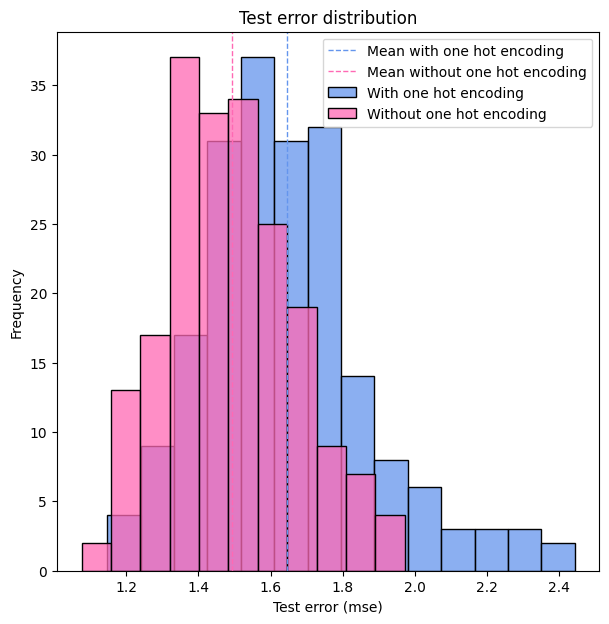

In [15]:
# making a plot of the test errors comparing the two models
plt.figure(figsize=(7,7))
sns.histplot(test_errors_linreg_200_onehot, color='cornflowerblue', label='With one hot encoding')
sns.histplot(test_errors_linreg_200_nohot, color='hotpink', label='Without one hot encoding')
plt.xlabel('Test error (mse)')
plt.ylabel('Frequency')
plt.title('Test error distribution')
plt.axvline(np.mean(test_errors_linreg_200_onehot), color='cornflowerblue', linestyle='dashed', linewidth=1, label='Mean with one hot encoding')
plt.axvline(np.mean(test_errors_linreg_200_nohot), color='hotpink', linestyle='dashed', linewidth=1, label='Mean without one hot encoding')
plt.legend()
plt.show()


We see that the model that keeps the linear relations in the categorical features is the best one. This may be due to the fact that the categorical features are not ordinal, but that there is some linear relationship. As we take a closer look at the data, we see that the columns taken out, i.e. "H050", "nN", "C040", all represent some kind out atom count. Apperently, there must be some linear relationship between the number of atoms and the toxicity of the molecule. As I have no domain knowledge, I cannot say more about why this is. 
The model with one-hot encoding also had a lot of insignificant variables, which is not good. 

The reason we repeat the experiment many times before we can draw any conclusions, is that the train test split is random. This means that the result of the model can vary a lot depending on the split. By repeating the experiment many times, we can get a better estimate of the true error of the model given the data.

**(c). Apply different variable selection procedures (at least backward elimination and forward selection) with different stopping criteria (at least AIC and BIC) and compare the results. Do you obtain the same model?**

In [16]:
def backward_eliminiaton(df, criteria=None):

    # criteria is either "aic" or "bic" 
    
    # splitting the data
    X = df.drop(columns=["LC50"])
    y = df["LC50"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # adding a constant to the design matrix
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # fitting a linear regression model (ordinary least squares)
    model = sm.OLS(y_train, X_train_const).fit()

    # criteria for the initial model, either aic or bic
    if criteria == "aic":
        best_criteria = model.aic
    elif criteria == "bic":
        best_criteria = model.bic
    else:
        raise ValueError("Criteria must be either 'aic' or 'bic'")

    while True:
        # identifying the column with the highest p-value
        column_to_drop = model.pvalues.idxmax()
        
        # dropping the column and fitring a new model
        X_train_temp = X_train_const.drop(columns=column_to_drop)
        model_temp = sm.OLS(y_train, X_train_temp).fit()
        
        # calculating the criteria for the new model
        new_criteria = model_temp.aic if criteria == "aic" else model_temp.bic
        
        # updating the best criteria and model if improved
        if new_criteria < best_criteria:
            best_criteria = new_criteria
            X_train_const = X_train_temp
            model = model_temp
        else:
            break

    # error calculation
    X_test = X_test[X_train_const.columns[1:]]  # excluding the constant column

    final_columns = list(X_train_const.columns[1:])
    print(f"Number of columns removed: {len(X_train.columns) - len(final_columns)}")

    # adding a constant to the test data
    X_test_const = sm.add_constant(X_test)

    # predictions and error calculations
    y_pred_test = model.predict(X_test_const)
    y_pred_train = model.predict(X_train_const)

    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred_test)

    return train_error, test_error, final_columns

In [17]:
np.random.seed(seed)

train_error_aic_backwards,test_error_aic_backwards,final_columns_aic_backwards = backward_eliminiaton(df_nohot, "aic")
train_error_bic_backwards,test_error_bic_backwards,final_columns_bic_backwards = backward_eliminiaton(df_nohot, "bic")

Number of columns removed: 2
Number of columns removed: 2


In [18]:
def forward_selection(df, criteria=None):

    # criteria is either "aic" or "bic"

    # splitting the data
    X = df.drop(columns=['LC50'])
    y = df['LC50']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    # starting of with a constant column as the only column in the design matrix
    X_train_const = sm.add_constant(pd.DataFrame({"const": 1}, index=X_train.index))

    # fitting a linear regression model (ordinary least squares)
    model = sm.OLS(y_train, X_train_const).fit()

    # criteria for the initial model, either aic or bic
    if criteria == "aic":
        best_criteria = model.aic
    elif criteria == "bic":
        best_criteria = model.bic
    else:
        raise ValueError("Criteria must be either 'aic' or 'bic'")

    # initializing the list of added columns
    added_columns = []
    # columns that can be added to the model
    remaining_columns = X.columns.tolist() 

    while remaining_columns:
        best_temp_model = None
        best_column = None

        # looping through all columns to find the best column to add
        for column in remaining_columns:
            
            X_train_temp = X_train_const.copy()
            X_train_temp[column] = X_train[column]
            model_temp = sm.OLS(y_train, X_train_temp).fit()

            new_criteria = model_temp.aic if criteria == "aic" else model_temp.bic
            
            # updating if we found a better column to add
            if new_criteria < best_criteria:
                best_criteria = new_criteria
                best_temp_model = model_temp
                best_column = column

        # updating the model and the columns with the best column
        if best_temp_model and best_column:
            X_train_const[best_column] = X_train[best_column]
            model = best_temp_model
            remaining_columns.remove(best_column)
            added_columns.append(best_column)
        else:
            break

    print(f"Number of columns added: {len(added_columns)}")
    
    # aligning the test data with the selected columns in the training data
    X_test = X_test[added_columns]
    X_test_const = sm.add_constant(X_test)

    # predictions and error calculations
    y_pred_test = model.predict(X_test_const)
    y_pred_train = model.predict(X_train_const)

    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred_test)

    return train_error, test_error, added_columns


In [19]:
np.random.seed(seed)

train_error_aic_forward, test_error_aic_forward, final_columns_aic_forwards = forward_selection(df_nohot, "aic")
train_error_bic_forward, test_error_bic_forward,final_columns_bic_forwards = forward_selection(df_nohot, "bic")

Number of columns added: 6
Number of columns added: 6


In [51]:
# comparing the final models from backward elimination and forward selection with AIC and BIC
print("Final columns and test error (MSE) from backward elimination with AIC:")
print(final_columns_aic_backwards, test_error_aic_backwards)
print("\nFinal columns and test error (MSE) from forward selection with AIC:")
print(final_columns_aic_forwards, test_error_aic_forward)
print("\nFinal columns and test error (MSE) from backward elimination with BIC:")
print(final_columns_bic_backwards, test_error_bic_backwards)
print("\nFinal columns and test error (MSE) from forward selection with BIC:")
print(final_columns_bic_forwards, test_error_bic_forward)

Final columns and test error (MSE) from backward elimination with AIC:
['TPSA', 'SAacc', 'MLOGP', 'RDCHI', 'GATS1p', 'nN'] 1.5203617094075996

Final columns and test error (MSE) from forward selection with AIC:
['MLOGP', 'TPSA', 'SAacc', 'nN', 'RDCHI', 'GATS1p'] 1.427044503421829

Final columns and test error (MSE) from backward elimination with BIC:
['TPSA', 'SAacc', 'MLOGP', 'RDCHI', 'GATS1p', 'nN'] 1.4059023413131655

Final columns and test error (MSE) from forward selection with BIC:
['MLOGP', 'TPSA', 'SAacc', 'nN', 'GATS1p', 'RDCHI'] 1.467511490498329


In this case the all four methods happen to give the same model. This is somewhat sensitive to random seed and a different seed can give a different result. I would have expected the models with BIC to have fewer variables than the models with AIC, but this is not the case. This is because BIC penalizes more for the number of variables.

That forwards and backwards elimination give the same result is less surprising, as they are essentially the same algorithm, just in different directions.

The test errors are very comparable, with backward elimination trained with BIC as the stopping criteria giving the lowest test error.

**(d). Apply ridge regression and use both a bootstrap procedure and cross-validation (choose the number of folds you prefer) to find the optimal complexity parameter in a grid of candidate parameter values of your own choice. Provide a plot in which the results of the two procedures are contrasted and comment on them.**

In [21]:
def bootstrap_samples(df, n_boot_samples):
    # creating n_boot_samples bootstrap samples

    X = df.drop(columns=['LC50'])
    y = df['LC50']
    samples = []

    for j in range(n_boot_samples):
        # drawing indices with replacement
        idx = np.random.choice(X.index, size=len(X), replace=True)
        X_boot = X.loc[idx] # selecting the rows with the drawn indices
        y_boot = y.loc[idx] # selecting the corresponding target values
        
        # test set is those not in the bootstrap sample
        X_test = X.loc[~X.index.isin(idx)]
        y_test = y.loc[~y.index.isin(idx)]

        samples.append((X_boot, X_test, y_boot, y_test))

    return samples

def one_ridge_boot(sample, lmbda):

    # ridge for one bootstrap sample, essentially just ridge

    X_train, X_test, y_train, y_test = sample

    # model is Ridge regression model with the chosen lambda
    model = Ridge(alpha=lmbda, fit_intercept=False)

    # fitting the model
    model.fit(X_train, y_train)

    # prections
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # error calculations
    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred)

    return test_error, train_error

def bootstrap_Ridge(boot_samples, lmbda):

    # calculating the test error and train error for each bootstrap sample and then averaging them

    test_errors = []
    train_errors = []

    for sample in boot_samples:
        test_error, train_error = one_ridge_boot(sample, lmbda)
        test_errors.append(test_error)
        train_errors.append(train_error)

    test_error = np.mean(test_errors)
    train_error = np.mean(train_errors)

    return test_error, train_error


In [22]:
np.random.seed(seed)

lambda_values = np.logspace(-5, 3, 100) # lambda values to test

test_errors_bootstrap_ridge = []
train_errors_bootstrap_ridge = []

# normalizing the data, especially important for Ridge regression as it is sensitive to the scale of the features
df_nohot_normalized = (df_nohot - df_nohot.mean()) / df_nohot.std()

for lmbda in lambda_values:
    boot_samples = bootstrap_samples(df_nohot_normalized, n_boot_samples=200)
    test_error, train_error = bootstrap_Ridge(boot_samples, lmbda)
    test_errors_bootstrap_ridge.append(test_error)
    train_errors_bootstrap_ridge.append(train_error)

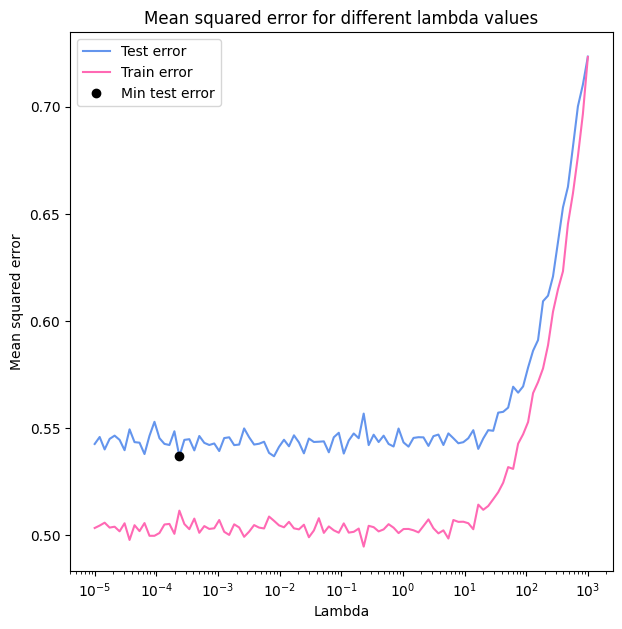

In [33]:
start_idx = 0
end_idx = 100

# plotting
plt.figure(figsize=(7,7))
plt.plot(lambda_values[start_idx:end_idx], test_errors_bootstrap_ridge[start_idx:end_idx], label='Test error', color='cornflowerblue')
plt.plot(lambda_values[start_idx:end_idx], train_errors_bootstrap_ridge[start_idx:end_idx], label='Train error', color='hotpink')
min_idx = np.argmin(test_errors_bootstrap_ridge)    
plt.plot(lambda_values[min_idx], test_errors_bootstrap_ridge[min_idx], 'o', label='Min test error', color='black')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean squared error')
plt.title('Mean squared error for different lambda values')
plt.legend()
plt.show()

In [34]:
# finding the best test error
min_error_bootstrap_ridge = np.min(test_errors_bootstrap_ridge) # smallest test error
min_error_idx = np.argmin(test_errors_bootstrap_ridge) # index of the smallest test error
best_lambda = lambda_values[min_error_idx % len(lambda_values)] 

min_error_train_bootstrap_ridge = train_errors_bootstrap_ridge[min_error_idx] #for later

print(f"Best lambda: {best_lambda:.5f}")
print(f"Minimum test error: {min_error_bootstrap_ridge:.3f}")

Best lambda: 0.00024
Minimum test error: 0.537


In [35]:
def Ridge_CV(df, lmbda, k_folds=5):
    train_errors = []
    test_errors = []
    
    # normalizing the data
    # especially important for Ridge regression as it is sensitive to the scale of the features
    df = (df - df.mean()) / df.std()

    # splitting the dataset into k folds
    folds = np.array_split(df, k_folds)
    
    for i in range(k_folds):
        # the i-th fold is the test set, the rest is the training set
        train_folds = [fold for j, fold in enumerate(folds) if j != i]
        test_fold = folds[i]
        
        # concatenate the training folds
        train_data = pd.concat(train_folds)
        X_train = train_data.drop(columns=['LC50'])
        y_train = train_data['LC50']
        
        # test set, the i-th fold
        X_test = test_fold.drop(columns=['LC50'])
        y_test = test_fold['LC50']
        
        # ridge regression model
        model = Ridge(alpha=lmbda, fit_intercept=False)
        model.fit(X_train, y_train)
        
        # predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # errors
        train_error = mse(y_train, y_pred_train)
        test_error = mse(y_test, y_pred_test)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    # average train and test errors across folds
    train_error = np.mean(train_errors)
    test_error = np.mean(test_errors)
    
    return train_error, test_error



Best lambda: 3.1257158496882416
Minimum test error: 0.557


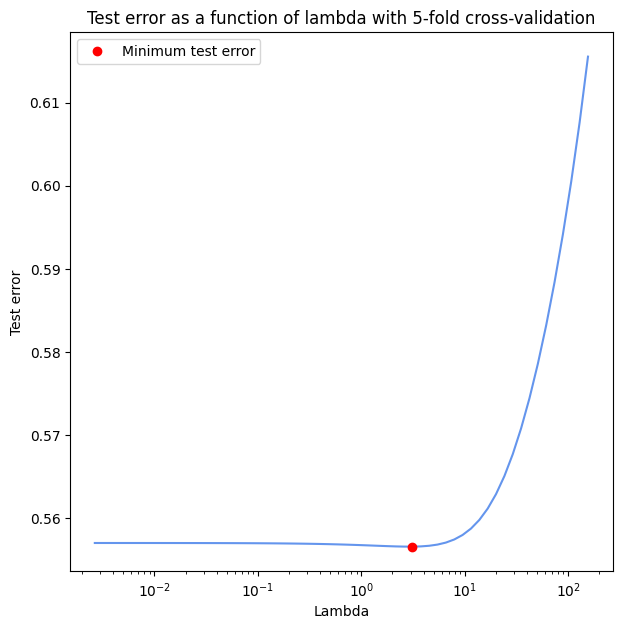

In [36]:
test_errors_cv_ridge = []
train_errors_cv_ridge = []


for lmbda in lambda_values:
    train_error, test_error = Ridge_CV(df_nohot, lmbda)
    train_errors_cv_ridge.append(train_error)
    test_errors_cv_ridge.append(test_error)

# find best lambda
min_error_cv_ridge = np.min(test_errors_cv_ridge)
min_error_cv_ridge_idx = np.argmin(test_errors_cv_ridge)
best_lambda = lambda_values[min_error_cv_ridge_idx]
print(f"Best lambda: {best_lambda}")
print(f"Minimum test error: {min_error_cv_ridge:.3f}")

# lowest train error (for later)
min_error_train_cv_ridge = train_errors_cv_ridge[min_error_cv_ridge_idx]

start_idx = 30
end_idx = 90

#plotting
plt.figure(figsize=(7,7))
plt.plot(lambda_values[start_idx:end_idx],test_errors_cv_ridge[start_idx:end_idx], color='cornflowerblue')
plt.plot(best_lambda, min_error_cv_ridge, 'o', color='red', label='Minimum test error')
plt.xlabel('Lambda')
plt.ylabel('Test error')
plt.title('Test error as a function of lambda with 5-fold cross-validation')
plt.xscale('log')
plt.legend()
plt.show()


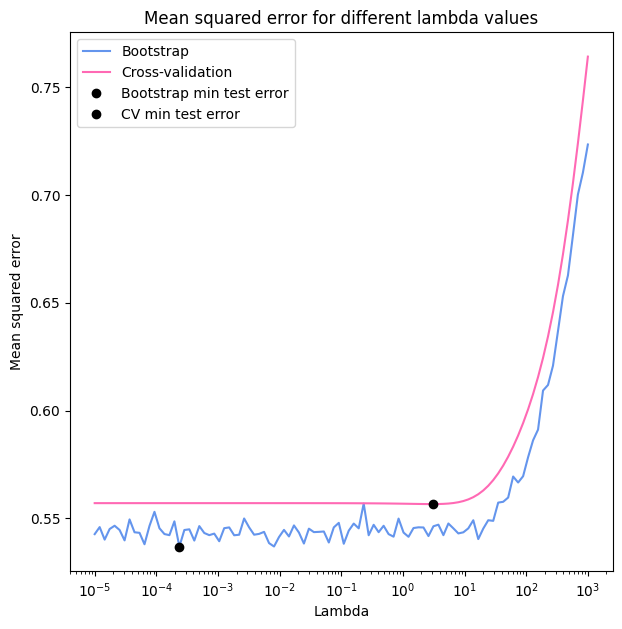

In [37]:
# contrasting the results from bootstrap and cross-validation

# plotting both in the same plot
plt.figure(figsize=(7,7))
plt.plot(lambda_values, test_errors_bootstrap_ridge, label='Bootstrap', color='cornflowerblue')
plt.plot(lambda_values, test_errors_cv_ridge, label='Cross-validation', color='hotpink')
plt.plot(lambda_values[min_error_idx], min_error_bootstrap_ridge, 'o', label='Bootstrap min test error', color='black')
plt.plot(lambda_values[min_error_cv_ridge_idx], min_error_cv_ridge, 'o', label='CV min test error', color='black')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean squared error')
plt.title('Mean squared error for different lambda values')
plt.legend()
plt.show()

The results from bootstrap and CV are fairly comparable. The final value for lambda is very different, but the test error on the plot is by eye quite similar. The bootstrap error is slightly lower than the CV error. This is probably due to the fact that the bootstrap error is slightly overoptimistic as the 0.632 bootstrap method was not used. This could have been used to get a better estimate of the true error. Furthermore we notice that the bootstrap error is more noisy than the CV error. This is probably due to the bootstrap sampling process, which introduces more variability due to the random resampling of data points.

I think the value for lambda from the CV is weirdly high and I was expecting a lower value. I am struggling to understand why this is the case. Initially I figured it was because of the lack of normalisation of the data, but after normalising the data, the result was similar. I might have made a mistake in the code or normalized in the wrong way, but I am not sure. The lambda value for the bootstrap is more in line with what I was expecting. But as one can see from the plot, it could easily have been higher as the test error is quite "noisy". 

**(e). To also allow for nonlinear effects, fit a generalised additive model (GAM) in which the effects of the variables are fitted using smoothing splines. Try at least two different levels of complexity for the smoothing splines. Report the results and comment on them.**

In [28]:
def GAM(df, n_splines, lam):

    # lam is the penalty term for the smoothness of the splines
    # n_splines is the number of splines for each feature
    
    # train test split
    X = df.drop(columns=['LC50'])
    y = df['LC50']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # initializing the model, using a spline for each feature 
    model = LinearGAM(s(0, n_splines=n_splines, lam=lam) + 
                      s(1, n_splines=n_splines, lam=lam) + 
                      s(2, n_splines=n_splines, lam=lam) + 
                      s(3, n_splines=n_splines, lam=lam) + 
                      s(4, n_splines=n_splines, lam=lam) + 
                      s(5, n_splines=n_splines, lam=lam) + 
                      s(6, n_splines=n_splines, lam=lam) + 
                      s(7, n_splines=n_splines, lam=lam))
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # predictions for train and test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # errors
    train_error = mse(y_train, y_pred_train)
    test_error = mse(y_test, y_pred_test)
    
    return train_error, test_error

In [29]:
np.random.seed(seed) 

# trying a simple model with 8 splines, and a more complex model with 15 splines and a smaller lambda
results_simple = GAM(df_nohot, n_splines=8, lam=0.1)
results_complex = GAM(df_nohot, n_splines=15, lam=0.01)

print(f"Simple Model -> Train Error: {results_simple[0]:.3f}, Test Error: {results_simple[1]:.3f}")
print(f"Complex Model -> Train Error: {results_complex[0]:.3f}, Test Error: {results_complex[1]:.3f}")

Simple Model -> Train Error: 1.219, Test Error: 1.472
Complex Model -> Train Error: 1.056, Test Error: 2.749


The more simple model has the definitive lowest test error. The test and train errors are also quite similar for the simple model. For the complex however, the test error is much higher than the train error. This is a sign of overfitting. The train error for the complex model is lower than for the simple model, but this is to no help as the test error is what we are interested in.

This might indicate that the complexity of the simple model is enough to capture the underlying structure of the data.

**(f). Fit a model using a regression tree. Draw the tree and report how the cost-complexity pruning led to the selected tree size.**

In [47]:
def regression_tree(df):
    
    # splitting the data
    X = df.drop(columns=['LC50'])
    y = df['LC50']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # initial tree, before pruning
    model = DecisionTreeRegressor(random_state=seed) # same seed every time 
    model.fit(X_train, y_train)

    # cost-complexity pruning
    path = model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas # alphas to test

    # training trees with different ccp_alphas
    models = []
    train_errors = []
    test_errors = []

    # making a tree for each ccp_alpha
    for ccp_alpha in ccp_alphas:
        tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=seed)
        tree.fit(X_train, y_train)
        models.append(tree)

        # errors 
        train_errors.append(mse(y_train, tree.predict(X_train)))
        test_errors.append(mse(y_test, tree.predict(X_test)))

    # plotting to visually see the best ccp_alpha for the pruned tree
    plt.figure()
    plt.plot(ccp_alphas, train_errors, label="Train Error", color='cornflowerblue')
    plt.plot(ccp_alphas, test_errors, label="Test Error", color='hotpink')
    min_idx = np.argmin(test_errors)
    plt.plot(ccp_alphas[min_idx], test_errors[min_idx], 'o', color='black', label='Min test error')
    plt.xlabel("ccp_alpha")
    plt.ylabel("Mean Squared Error")
    plt.title("Cost-Complexity Pruning")
    plt.legend()
    plt.show()

    # findingg the best based on the lowest test error
    best_alpha = ccp_alphas[np.argmin(test_errors)]
    best_model = DecisionTreeRegressor(random_state=seed, ccp_alpha=best_alpha)
    best_model.fit(X_train, y_train)

    final_tree_size = best_model.tree_.node_count
    final_tree_depth = best_model.get_depth()

    print(f"Final tree size: {final_tree_size} (number of nodes)")
    print(f"Final tree depth: {final_tree_depth} (number of levels)")

    # plotting the final pruned tree 
    plt.figure(figsize=(12, 8))
    plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
    plt.title("Pruned Regression Tree")
    plt.show()

    # errors for the final pruned tree
    train_error = mse(y_train, best_model.predict(X_train))
    test_error = mse(y_test, best_model.predict(X_test))
    
    return train_error, test_error


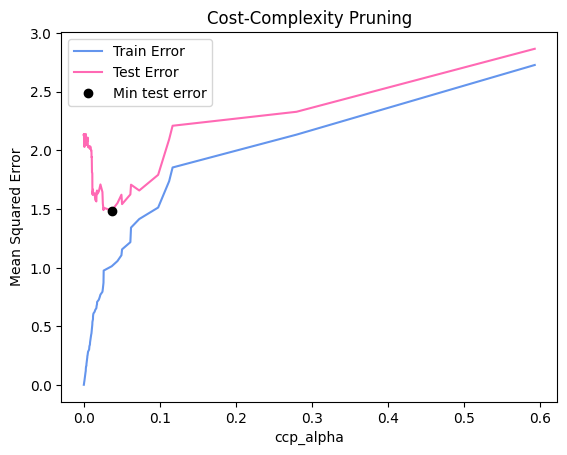

Final tree size: 27 (number of nodes)
Final tree depth: 5 (number of levels)


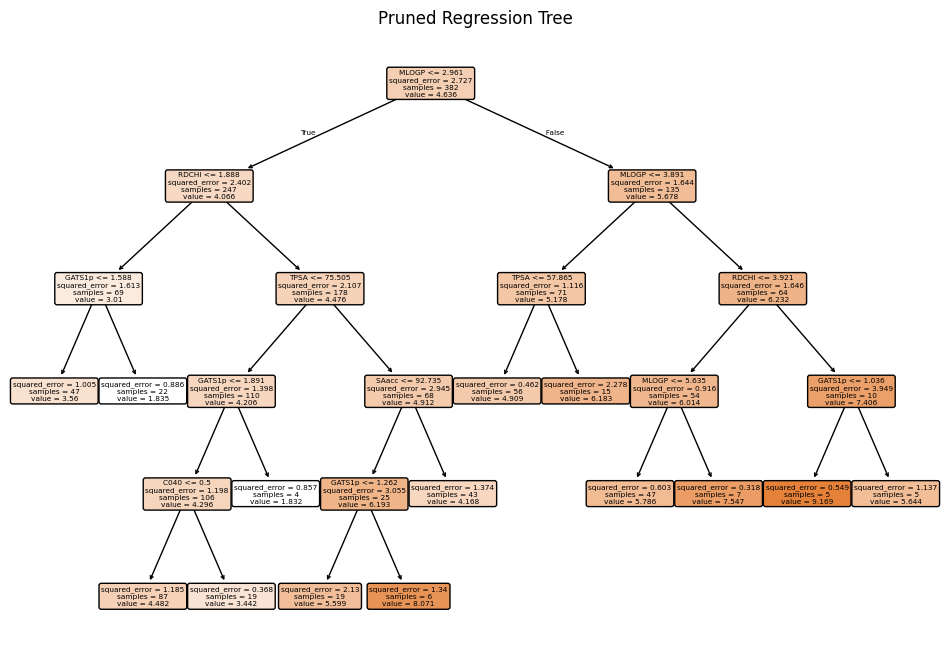

In [49]:
np.random.seed(seed)

train_error_tree, test_error_tree = regression_tree(df_nohot)

I pruned the tree using scikit-learn's DecisionTreeRegressor and the cost complexity pruning functionality that comes with it. The documentation for this can be found at: https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html. 

Esentially, the cost-complexity pruning process involves training multiple regression trees, each with a different ccp_alpha value, which controls the pruning level. For each ccp_alpha, I computed the mean squared error (MSE) on both the training and test sets, observing how the errors changed with increasing pruning. The selected tree size corresponds to the ccp_alpha value with the minimum test MSE, as plotted. From the first plot we see that the test error initially goes down av ccp_alpha increases, but then starts to increase again. A higher ccp_alpha value will lead to a smaller tree, which is less likely to overfit the data, but be see that it does not do well on the test set either when it gets too high.

**(g). Compare all the models implemented in the previous points in terms of both training and test error and comment on the results.**

In [50]:

info_errors = {
    "Model": [
        "Linear regression w/ one hot",
        "Linear regression wo/ one hot",
        "Linear regression w/ one hot (average over 200)",
        "Linear regression wo/ one hot (average over 200)",
        "Backward elimination with AIC",
        "Forward selection with AIC",
        "Backward elimination with BIC",
        "Forward selection with BIC",
        "Bootstrap Ridge",
        "Cross-validated Ridge",
        "GAM (Simple Model)",
        "GAM (Complex Model)",
        "Regression Tree"
    ],
    "Train Error": [
        train_error_linreg_one_hot,
        train_error_linreg_no_hot,
        np.mean(train_errors_linreg_200_onehot),
        np.mean(train_errors_linreg_200_nohot),
        train_error_aic_backwards,
        train_error_aic_forward,
        train_error_bic_backwards,
        train_error_bic_forward,
        min_error_train_bootstrap_ridge,
        min_error_train_cv_ridge,
        results_simple[0],
        results_complex[0],
        train_error_tree
    ],
    "Test Error": [
        test_error_linreg_one_hot,
        test_error_linreg_no_hot,
        np.mean(test_errors_linreg_200_onehot),
        np.mean(test_errors_linreg_200_nohot),
        test_error_aic_backwards,
        test_error_aic_forward,
        test_error_bic_backwards,
        test_error_bic_forward,
        min_error_bootstrap_ridge,
        min_error_cv_ridge,
        results_simple[1],
        results_complex[1],
        test_error_tree
    ],
}

df = pd.DataFrame(info_errors)
df


,Model,Train Error,Test Error
0,Linear regression w/ one hot,1.291695,1.572933
1,Linear regression wo/ one hot,1.388032,1.520977
2,Linear regression w/ one hot (average over 200),1.296624,1.644752
3,Linear regression wo/ one hot (average over 200),1.411455,1.492148
4,Backward elimination with AIC,1.389318,1.520362
5,Forward selection with AIC,1.429601,1.427045
6,Backward elimination with BIC,1.439452,1.405902
7,Forward selection with BIC,1.411712,1.467511
8,Bootstrap Ridge,0.511546,0.536858
9,Cross-validated Ridge,0.508822,0.556591


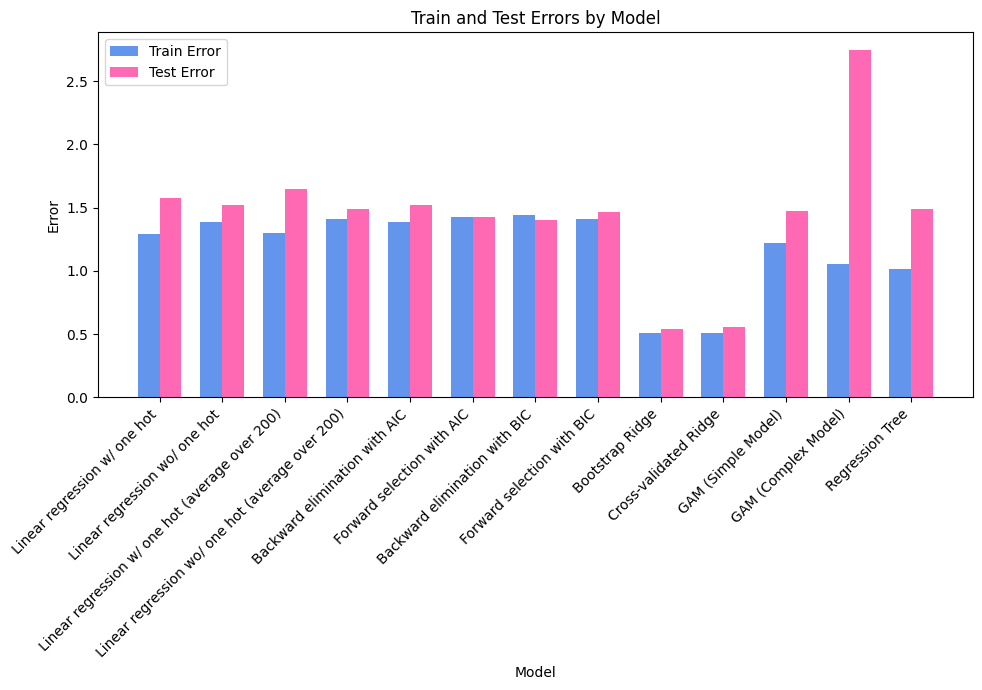

In [66]:
# vidualizing the errors in a bar plot for all the models for the regression problem
fig, ax = plt.subplots(figsize=(10, 7))
bar_width = 0.35
index = np.arange(len(df))

train_bars = ax.bar(index, df['Train Error'], bar_width, label='Train Error', color='cornflowerblue')
test_bars = ax.bar(index + bar_width, df['Test Error'], bar_width, label='Test Error', color='hotpink')

ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Train and Test Errors by Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

Above is a comparison of all the models used for the regression problem. 

For linear regression it is most useful to look at the average over the 200 models. As stated earlier, the one without one-hotted variables is the best. That is also why I chose to continue with that version of the data for the remaining models. The test and train errors for the linear regression model are quite similar, which is a sign the model is not overfitting. The test error for the linear regression model averaged over 200 runs without one-hot encoding is among the highest of the models.

For the variable selection models, the test errors are quite similar. The model with the lowest test error is the one with backward elimination and BIC as the stopping criteria. Their test and train errors are also quite similar, which is a sign we do not have much overfitting. 

The definitively best performning models are the ridge models. We have used bootstrapping and cv on these, so the errors are averaged over many runs. It seems that the penalty from ridge regression makes the model much better, but there might also be something wring in the implementation. 

The simple GAM model is comparable to the other normal linear regression models. In this case I would then rather choose a simpler model. GAM is more complex to understand and interpret and as it does not offer a much better performance, I would not choose it. The complex GAM is overfitting a lot, as discussed earlier.

The tree is also comparable to the normal linear regression models in terms of test error. The tree is very easy to interpret. The difference between the test and train error is quite large, which is a sign of overfitting.

In sum I would choose the ridge regression model with cross validation as the best model for this data. Bootstrapping has a slightly lower test error, but I suspect this is due to the fact that I have not used the 0.632 method for error calculation. So i believe it is a bit too optimistic, while the CV error is correcvtly calculated.

### Classification

In [67]:
data_classification = pd.read_csv('https://www.uio.no/studier/emner/matnat/math/STK-IN4300/h24/pimaindiansdiabetes2.csv')
data_classification

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,neg
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,neg
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,neg
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,pos


In [68]:
# one hot encode the response variable, diabetes
data_classification['diabetes'] = pd.Categorical(data_classification['diabetes'])
data_classification['diabetes'] = data_classification['diabetes'].cat.codes

In [69]:
# check for nan values
data_classification.isna().sum()
# fill nan values with the mean
data_classification.fillna(data_classification.mean(), inplace=True)
data_classification

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


**Information about the columns**

pregnant: number of pregnancies;

glucose: plasma glucose concentration at 2 h in an oral glucose tolerance test;

pressure: diastolic blood pressure (mm Hg);

triceps: triceps skin fold thickness (mm);

insulin: 2-h serum insulin (µU/mL);

mass: body mass index (kg/m2);

pedigree: diabetes pedigree function;

age: age (years);

In [70]:
# train test split
np.random.seed(seed)

X = data_classification.drop(columns=['diabetes'])
y = data_classification['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**(a). Fit a k-NN classifier on the data and select the optimal number of neighbours, k, using both 5-fold and leave-one-out cross-validation. Plot the estimated errors of each cross-validation procedure for the considered range of candidate values of k in a single figure. Add also to the figure the corresponding test errors, that is, the test error you would have obtained when fitting k-NN for the different values of k. Comment on the results.**

In [71]:
def knn_CV(df, k_values, k_folds=None):
    
    if k_folds is None:
        k_folds = len(df)  # Leave-one-out cross-validation (LOOCV)

    # will contain the average error for each k
    avg_train_errors = [] 
    avg_test_errors = []
    
    # Split the data into folds
    folds = np.array_split(df, k_folds)
    
    for k in tqdm(k_values):
        train_errors = []
        test_errors = []
        
        for i in range(k_folds):
            
            # test data is the i-th fols, the rwst is the training data
            train_data = pd.concat([fold for j, fold in enumerate(folds) if j != i])
            X_train = train_data.drop(columns=['diabetes'])
            y_train = train_data['diabetes']
            
            # test set = the i-th fold
            X_test = folds[i].drop(columns=['diabetes'])
            y_test = folds[i]['diabetes']
            
            # knn model 
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            
            # preds
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            #  errors
            train_error = 1 - accuracy_score(y_train, y_pred_train)
            test_error = 1 - accuracy_score(y_test, y_pred_test)
            
            train_errors.append(train_error)
            test_errors.append(test_error)
        
        # avergae errors over folds for each k
        avg_train_errors.append(np.mean(train_errors))
        avg_test_errors.append(np.mean(test_errors))
    
    return avg_train_errors, avg_test_errors


In [72]:
k_values = np.arange(5, 21) # array of k values to test
train_errors_knn, test_error_knn = knn_CV(data_classification, k_values, 5) # 5 fold cross-validation
best_k_5_fold = k_values[np.argmin(test_error_knn)]
print(f"Best k from 5-fold cross-validation: {best_k_5_fold}")

train_error_bestk_5fold = train_errors_knn[np.argmin(test_error_knn)]
test_error_bestk_5fold = np.min(test_error_knn)

100%|██████████| 16/16 [00:01<00:00, 14.65it/s]

Best k from 5-fold cross-validation: 12


In [73]:
### LOOCV
k_values = np.arange(5, 21) 

train_errors_knn_loocv, test_error_knn_loocv = knn_CV(data_classification, k_values, k_folds=len(data_classification))

best_k_loocv = k_values[np.argmin(test_error_knn_loocv)]
print(f"Best k from LOOCV: {best_k_loocv}")

train_error_bestk_loocv = train_errors_knn_loocv[np.argmin(test_error_knn_loocv)]
test_error_bestk_loocv = np.min(test_error_knn_loocv)


100%|██████████| 16/16 [09:37<00:00, 36.10s/it]

Best k from LOOCV: 13


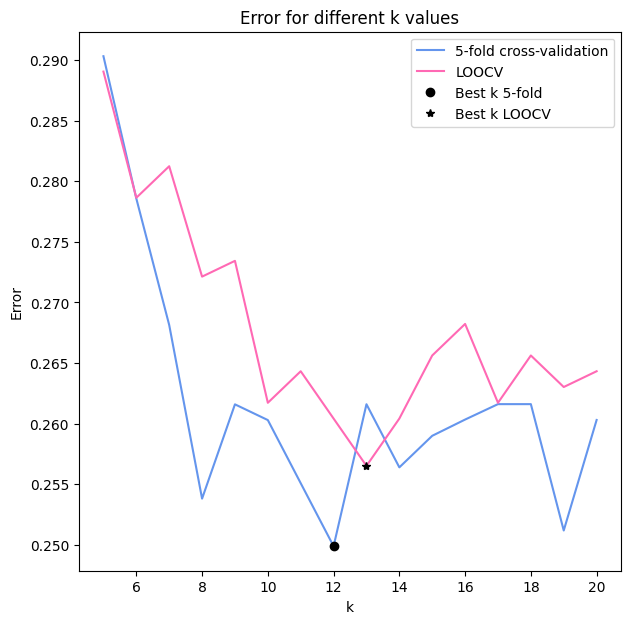

In [201]:
# plotting the result from both the 5-fold cross-validation and LOOCV

plt.figure(figsize=(7,7))
plt.plot(k_values, test_error_knn, label='5-fold cross-validation', color='cornflowerblue')
plt.plot(k_values, test_error_knn_loocv, label='LOOCV', color='hotpink')
plt.plot(best_k_5_fold, test_error_bestk_5fold, 'o', label='Best k 5-fold', color='black')
plt.plot(best_k_loocv, test_error_bestk_loocv, '*', label='Best k LOOCV', color='black')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error for different k values')
plt.legend()
plt.show()

The test error is lower for k = 5 than for LOOCV. However, if you look closely at the y-axis, the difference is very small. When considering the computational time, I would use 5-fold cross validation to decide on a good k. 

A k = 12/13 (from 5-fold/LOOCV) seems to be the best choice for this data set. The k in knn is the number of neighbours to consider when classifying a new data point. A higher k will make the model more robust to noise, but also less flexible. A lower k will make the model more flexible, but also more sensitive to noise. This is a bias variance tradeoff. With a low k, the model will have low bias, but high variance. With a high k, the model will have high bias, but low variance. We see that the mse is initialy high and then goes down as k increases. This is because we introce some bias into the model, but also reduce the variance. The decomposition of the mse shows this: mse = bias^2 + variance + irreducible error.

**(b). Fit a generalized additive model (GAM) with splines and use a variable selection method to find the best model. Report the selected model and comment on the results, in particular, describe briefly the effects that the variables have on the response.**

In [192]:
def backwards_GAM(df):

    # splitting
    X = df.drop(columns=['diabetes'])
    y = df['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # starting with all features
    features = list(range(X.shape[1]))
    best_score = float('inf')
    best_model = None
    best_features = features.copy()
    
    while len(best_features) > 1:
        scores = []
        models = []
        feature_sets = []
        
        # trying to remove each feature, one at a time
        for feature in best_features:

            current_features = [f for f in best_features if f != feature]
            
            # terms for the GAM model
            terms = s(current_features[0])
            for f in current_features[1:]:
                terms += s(f)
            
            # fitting the model
            gam = LinearGAM(terms, fit_intercept=True)
            gam.fit(X_train, y_train)
            
            # aic score
            score = gam.statistics_['AIC']
            
            # storing the results
            scores.append(score)
            models.append(gam)
            feature_sets.append(current_features)
        
        # finding the feature removal that gives the lowest AIC score
        best_idx = scores.index(min(scores))
        if scores[best_idx] < best_score:  # If the score is better, update the best set
            best_score = scores[best_idx]
            best_model = models[best_idx]
            best_features = feature_sets[best_idx]
        else:
            break  # if none of the feature removals improve the model, stop
        
    # Threshold predictions for accuracy calculation
    y_pred_train = best_model.predict(X_train) > 0.5
    y_pred_test = best_model.predict(X_test) > 0.5
    
    # Calculate train and test errors
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    print(f"Number of features removed: {X.shape[1] - len(best_features)}")
    best_features = [X.columns[f] for f in best_features]
    print(f"Remaining features: {best_features}")

    return train_error, test_error, best_model


In [204]:
np.random.seed(seed)
train_error_gam, test_error_gam, best_model_gam = backwards_GAM(data_classification)
print(f"Train error: {train_error_gam:.3f}")
print(f"Test error: {test_error_gam:.3f}")

Number of features removed: 7
Remaining features: ['pressure']
Train error: 0.343
Test error: 0.355


In [205]:
print(best_model_gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.1695
Link Function:                     IdentityLink Log Likelihood:                                  -873.1104
Number of Samples:                          537 AIC:                                             1770.5599
                                                AICc:                                            1771.1718
                                                GCV:                                                0.2294
                                                Scale:                                              0.2208
                                                Pseudo R-Squared:                                   0.0451
Feature Function                  Lam

/var/folders/7v/5hgy8rx53wx807_53t1p9dsc0000gn/T/ipykernel_64658/1911105487.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(best_model_gam.summary())


Interestingly enough, only one feature is left after the full model is fitted with backward elimination and aic is the stopping criteria. The remaining feature is the diastolic blood pressure. This is a bit surprising to me, as I would have expected more features to be important. I might have implemented the model in the wrong way, but I am not sure. It may also be that the features are very correlated. I struggled to get forward selection to work, so I cannot compare with it. 

The s(2) term has a low p-value (3.93e-02), meaning it is statistically significant (using a threshold of 0.05). The effective degrees of freedom (EDoF) for s(2) is 11.2, indicating that the model has allowed a fair amount of flexibility in fitting this variable, likely capturing a nonlinear relationship between diastolic blood pressure and the response.

**(c). Fit (i) a classification tree, (ii) an ensemble of bagged trees and (iii) a random forest to the data. Report the training and the test error for each method and comment on results.**

In [85]:
def classification_tree(df):

    # splitting the data
    X = df.drop(columns=['diabetes'])
    y = df['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # initial tree
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train, y_train)

    # predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # errors
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    return train_error, test_error, model

In [86]:
train_error_tree, test_error_tree, model_tree = classification_tree(data_classification)
print(f"Train error: {train_error}")
print(f"Test error: {test_error}")

Train error: 0.7479380213658703
Test error: 0.7641527021776842


In [118]:
def bagged_trees(df, n_trees=100):

    # splitting the data
    X = df.drop(columns=['diabetes'])
    y = df['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # initialze lists to store predictions
    train_predictions = []
    test_predictions = []

    for i in range(n_trees):

        # making a bootstrapped sample
        X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, replace=True)
        
        # fitting the tree on the bootstrapped sample
        model = DecisionTreeClassifier(max_depth=5)
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # preds 
        train_predictions.append(model.predict(X_train))
        test_predictions.append(model.predict(X_test))
        
    #  majority vote for classification
    train_predictions = np.array(train_predictions).T
    test_predictions = np.array(test_predictions).T

    y_pred_train = [np.bincount(train_predictions[i].astype(int)).argmax() for i in range(train_predictions.shape[0])]
    y_pred_test = [np.bincount(test_predictions[i].astype(int)).argmax() for i in range(test_predictions.shape[0])]

    # errors
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    return train_error, test_error

In [119]:
np.random.seed(seed)
train_error_avg_bagging, test_errors_avg_bagging = bagged_trees(data_classification, n_trees=100)
print(f"Average train error: {np.mean(train_error_avg_bagging):.3f}")
print(f"Average test error: {np.mean(test_errors_avg_bagging):.3f}")

Average train error: 0.130
Average test error: 0.264


In [120]:
# a random forest is almost as bagging, but with a random subset of features for each tree

def random_forest(df, n_trees=200, max_features='sqrt', max_depth=5):

    # max_features is the number of features to consider when looking for the best split
    # when max_features='sqrt', it is the square root of the number of features, this is a common choice
    
    # splitting the data
    X = df.drop(columns=['diabetes'])
    y = df['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # lists to store predictions from each tree
    train_predictions = []
    test_predictions = []

    for i in range(n_trees):

        # Bootstrap sampling for each tree
        X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, replace=True)
        
        # fitting a decision tree with feature randomness
        model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # storing preds
        train_predictions.append(model.predict(X_train))
        test_predictions.append(model.predict(X_test))


    # majority vote for classification
    train_predictions = np.array(train_predictions).T
    test_predictions = np.array(test_predictions).T

    y_pred_train = [np.bincount(train_predictions[i].astype(int)).argmax() for i in range(train_predictions.shape[0])]
    y_pred_test = [np.bincount(test_predictions[i].astype(int)).argmax() for i in range(test_predictions.shape[0])]

    # average train and test errors
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    return train_error, test_error


In [121]:
np.random.seed(seed)

train_error_random_forest, test_error_random_forest = random_forest(data_classification, n_trees=200)

print(f"Train error: {train_error_random_forest:.3f}")
print(f"Test error: {test_error_random_forest:.3f}")

Train error: 0.169
Test error: 0.247


In [207]:
# errors for all tree based models

print("Train error, Test error")
print("One tree:")
print(train_error_tree, test_error_tree)
print("Bagging:")
print(train_error_avg_bagging, np.mean(test_errors_avg_bagging))
print("Random Forest:")
print(train_error_random_forest, test_error_random_forest)

Train error, Test error
One tree:
0.14711359404096835 0.2597402597402597
Bagging:
0.13035381750465547 0.2640692640692641
Random Forest:
0.16945996275605213 0.24675324675324672


The random forest has the lowest test error, while the others are a tiny bit higher. The single tree and the bagging model have lower train errors, but higher test errors, this indicates that they overfit more than the random forest. The random forest only consideres a subset of features for each tree. That way the random forest reduces overfitting by introducing diversity among the trees. By randomly selecting a subset of features for each split, the model decreases the chance that any particular strong feature will dominate all the trees, which can lead to overfitting, as seen in single decision trees and bagging. 

**(d). Fit a neural network to the data. Specify what procedure you have used in order to choose the size of the network.**

In [122]:
def neural_network(df, hidden_layer_sizes):

    # splitting the data
    X = df.drop(columns=['diabetes'])
    y = df['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # fitting the model
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    model.fit(X_train, y_train)

    # preds
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # errors
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    return train_error, test_error

In [123]:
# having issues with convergence warnings when chosing bad hidden layer sizes, so surpressing them during the search for good hidden layer sizes
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [131]:
# doing a search to find the best hidden layer sizes
np.random.seed(seed)

hidden_layer_sizes = [8,16,32]
num_hidden_layers = [2,3,4]

permutations = []
train_errors = []
test_errors = []

for layers in tqdm(num_hidden_layers):
    for sizes in product(hidden_layer_sizes, repeat=layers):
        permutations.append(sizes)
        train_error, test_error = neural_network(data_classification, sizes)
        train_errors.append(train_error)
        test_errors.append(test_error)

min_test_error_nn = min(test_errors)
min_test_error_idx_nn = test_errors.index(min_test_error_nn)
optimal_sizes_nn = permutations[min_test_error_idx_nn]

print(f"Optimal hidden layer sizes: {optimal_sizes_nn}")
print(f"Minimum test error: {min_test_error_nn}")
print(f"Train error: {train_errors[min_test_error_idx_nn]}")

100%|██████████| 3/3 [00:22<00:00,  7.51s/it]

Optimal hidden layer sizes: (8, 8, 16, 8)
Minimum test error: 0.20779220779220775
Train error: 0.2830540037243948


**(e). Which method would you choose if someone asks you to analyse the data? Motivate why you would choose that particular method.**

In [195]:
# making a dataframe with the results

info_errors_classification = {
    "Model": [
        "KNN (5-fold)",
        "KNN (LOOCV)",
        "GAM",
        "Classification Tree",
        "Bagging",
        "Random Forest",
        "Neural Network"
    ],
    "Train Error": [
        train_error_bestk_5fold,
        train_error_bestk_loocv,
        train_error_gam,
        train_error_tree,
        train_error_avg_bagging,
        train_error_random_forest,
        train_errors[min_test_error_idx_nn]
    ],
    "Test Error": [
        test_error_bestk_5fold,
        test_error_bestk_loocv,
        test_error_gam,
        test_error_tree,
        np.mean(test_errors_avg_bagging),
        test_error_random_forest,
        min_test_error_nn
    ],
}

df_classification = pd.DataFrame(info_errors_classification)
df_classification

,Model,Train Error,Test Error
0,KNN (5-fold),0.225257,0.249877
1,KNN (LOOCV),0.225184,0.256510
2,GAM,0.338920,0.367965
3,Classification Tree,0.147114,0.259740
4,Bagging,0.130354,0.264069
5,Random Forest,0.169460,0.246753
6,Neural Network,0.283054,0.207792


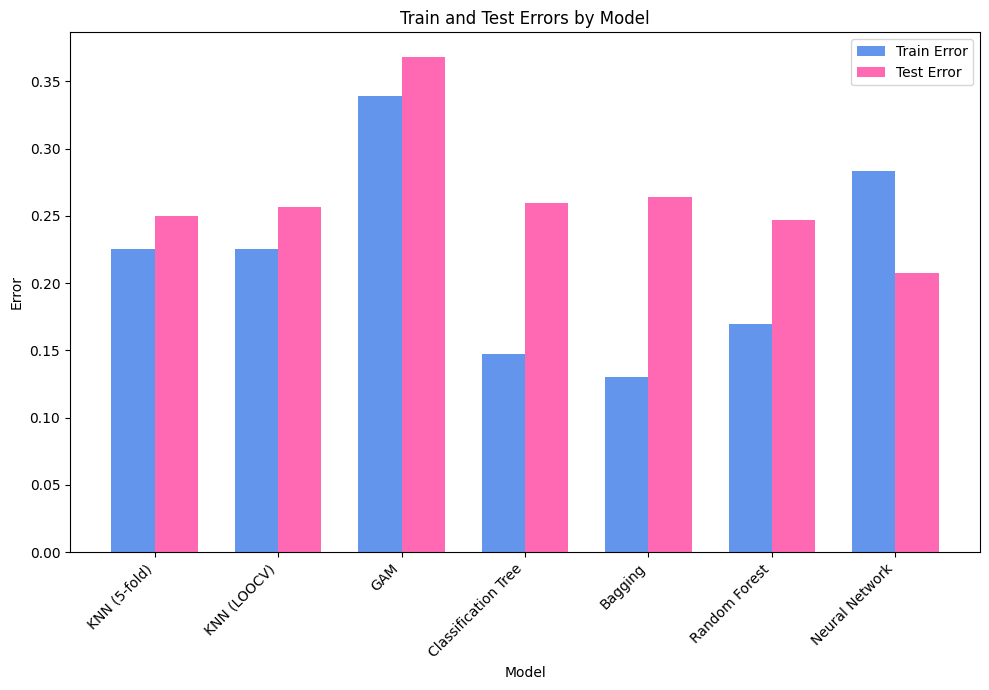

In [196]:
# make a bar plot to visualize the errors for the classification problem
fig, ax = plt.subplots(figsize=(10, 7))
bar_width = 0.35
index = np.arange(len(df_classification))

train_bars = ax.bar(index, df_classification['Train Error'], bar_width, label='Train Error', color='cornflowerblue')
test_bars = ax.bar(index + bar_width, df_classification['Test Error'], bar_width, label='Test Error', color='hotpink')

ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Train and Test Errors by Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_classification['Model'], rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

There are pros and cons of each method. The neural network has the lowest test error of them all and therefore might seem adventagous to choose. However, it is the least interpretable method. Some of the other methods do not perform much worse and offer a lot more explainability. The tree methods (one tree, bagging and random forest) are perhaps the most interpretable ones. I would not use just one tree as it is subject to a lot of randomness. Bagging and random forest are more stable and therefore more reliable. 

The GAM model could have been an ok choice as it also allows for the interpretation of the effects of the variables. However, my implementations of the model woth backwards selection as the model selevtion method ended in a model with just one variable. This seems a bit weird and I might not have implemented the model correctly. The errors are also alarmingly high compared to the other models. So in this specific case, I would not choose the GAM model. But it could be a good choice in other cases.

The knn models do well on the test error. There is little to gain when choosing LOOCV in contrast to 5-fold CV, so I would choose the latter (much faster). The knn model is also quite interpretable, as it is easy to understand how the model works.

I would recomend to choice either random forest or the knn model evaluated with 5-fold CV. Both are fairly easy to understand and perform well on the test error. 